# BUISNESS CASE: BASED ON GIVEN FEATURE WE NEED TO PREDICT THE LEAD CATEGORY OF CUSTOMER [HIGH POATENTIAL, LOW POTENTIAL]¶

#### IMPORTING NECESSARY LIBRARY

In [19]:
import os
import mysql.connector
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#### MAKING CONNECTION TO DATA BASE SERVER

In [2]:
connection = mysql.connector.connect(host ='18.136.157.135', # IP-address of data-base
                                    user ='dm_team2', # data-base Username
                                    password ='DM!$Team&27@9!20!',
                                    database ='project_sales') # data-base Password

In [3]:
query = "select * from data"
data = pd.read_sql(query,connection)
data = data.replace('','',regex=True) # Remove special character
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


# Basic Checks

In [4]:
data.head()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
0,14-11-2018 10:05,,Website,984XXXXXXX,aXXXXXXX@gmail.com,Sales-Agent-11,,Mode-5,Open
1,14-11-2018 09:22,,Website,XXXXXXX,#VALUE!,Sales-Agent-10,,Mode-5,Open
2,14-11-2018 09:21,,Website,XXXXXXX,dXXXXXXX@yahoo.com,Sales-Agent-10,,Mode-5,Open
3,14-11-2018 08:46,,Website,XXXXXXX,wXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open
4,14-11-2018 07:34,,Website,XXXXXXX,cXXXXXXX@gmail.com,Sales-Agent-10,,Mode-5,Open


In [5]:
data.tail()

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
7417,28-04-2018 09:45,9,Call,,aXXXXXXX@gmail.com,Sales-Agent-6,Mumbai,Mode-4,LOST
7418,28-04-2018 09:43,15,Call,,#VALUE!,Sales-Agent-12,Other Locations,Mode-5,LOST
7419,28-04-2018 09:20,5,Live Chat-Direct,,sXXXXXXX@gmail.com,Sales-Agent-11,Bangalore,Mode-1,Not Responding
7420,28-04-2018 08:04,21,CRM form,,YXXXXXXX@gmail.com,Sales-Agent-4,Other Locations,Mode-1,Just Enquiry
7421,28-04-2018 07:54,25,Website,,cXXXXXXX@gmail.com,Sales-Agent-3,Chennai,Mode-1,CONVERTED


In [6]:
data.describe(include="O")

,Created,Product_ID,Source,Mobile,EMAIL,Sales_Agent,Location,Delivery_Mode,Status
count,7422,7422,7422,7422,7422,7422,7422,7422,7422
unique,6752,30,26,487,883,13,18,5,11
top,26-09-2018 11:30,18,Call,,#VALUE!,Sales-Agent-4,Other Locations,Mode-5,Junk Lead
freq,4,1711,2547,1810,1701,1500,2500,2975,1536


In [7]:
data.shape

(7422, 9)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7422 entries, 0 to 7421
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Created        7422 non-null   object
 1   Product_ID     7422 non-null   object
 2   Source         7422 non-null   object
 3   Mobile         7422 non-null   object
 4   EMAIL          7422 non-null   object
 5   Sales_Agent    7422 non-null   object
 6   Location       7422 non-null   object
 7   Delivery_Mode  7422 non-null   object
 8   Status         7422 non-null   object
dtypes: object(9)
memory usage: 522.0+ KB


In [9]:
print(data['Status'].value_counts())


Status
Junk Lead               1536
Not Responding          1129
CONVERTED                834
Just Enquiry             760
Potential                708
Long Term                646
In Progress Positive     643
In Progress Negative     626
LOST                     440
Open                      82
converted                 18
Name: count, dtype: int64


# EDA



##### Univariate Analysis

In [10]:
import sweetviz as sv
import pandas as pd

# Generate the Sweetviz report
report = sv.analyze(data)

# Save the report to an HTML file
report.show_html('sweetviz_report.html')


                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


* Producut ID 

1.In this plot we are clearly seen that 18,15,19,27,9 and 5 Product ID has more sold product.

2.Remaining all product ID has less sold product.

* Source

1.Most of the sales has call, live chat direct and website source.

2.Remaining all sources has less than 250.

* Sales Agent

1.In this plot we are cleary seen the total 12 sales agent .

2.Most of the sales is done by sales agent 4 and sales agent 11 as well as sales agent 5.

3.Sales agent 3,9,7 has below than 850 sale.

4.Remaining all sales agent has done less sale.

* Location

1.Total 17 location of sales with include foreign and india.

2.Banglore and other location has more sales

3.chennai,hydrabad, delhi and mumbai city sale less than banglore and other location

4.Remaining all city has extreme less sale.

* Delivery Mode

1.In this plot we are clearly seen the five types of delivery mode.

2.Delivery Mode 5 has maximum use as well as highest count

3.Mode 1 & Mode 3 has less use than mode 5

4.Mode 2 & 4 is minimum use for delivery

* Status

1.In this plot we are clearly seen the junk lead means low potential customer or client has more.

2.Not responding status customer has less than 1200.

3.From above graph we can say that low potential customer has more and high potential cutomer has less.

# DATA PREPROCESSING/FEATURE ENGINEERING

In [11]:
# Dropping the columns which are of no use in analysis
data.drop(['Mobile'],axis=1,inplace=True)
data.drop(['EMAIL'],axis=1,inplace=True)
data.drop(['Created'],axis=1,inplace=True)

In [12]:
# Dropping rows with missing data because they are few
data.replace('',np.nan,inplace=True)
data.dropna(inplace=True)
data.reset_index(inplace=True,drop=True)
data.shape

(7328, 6)

In [13]:
# Compressing and Merging the labes in column
data.Source.replace(['Live Chat-Direct','Live Chat-Google Organic','Live Chat -PPC','Live Chat-Blog','Live Chat-Quora',
                    'Live Chat-CPC','Live Chat-Google Ads','Live Chat-Adwords Remarketing','Live Chat-Youtube',
                    'Live Chat-Justdial'],'Live Chat',inplace=True)
data.Source.replace(['Existing Client','CRM form','Personal Contact'],'Existing Customer',inplace=True)
data.Source.replace('By Recommendation','Customer Referral',inplace=True)
data.Source.replace(['US Website','Just Dial'],'Website',inplace=True)
data.Source.replace(['E-mail Campaign','SMS Campaign','E-Mail Message','Other'],'Campaign',inplace=True)

In [14]:
data.Location.replace(['UAE','USA','UK','AUSTRALIA','Singapore','Malaysia','EUROPE'],'Foreign',inplace=True)
data.Location.replace(['Howrah','Kolkata','Trivandrum'],'Other Locations',inplace=True)

In [15]:
data.Product_ID.replace(['8','6','3','17','22','11','7','28','0','23','24','16','13','4','14','26','12','2','21','25'],
                        'Less Sold Product',inplace=True)

In [16]:
# Defining 'Status' as 'Good' or 'Bad'
data.Status.replace(['CONVERTED','converted','In Progress Positive','Potential','Long Term','Open'],'Low Potential',inplace=True)
data.Status.replace(['LOST','In Progress Negative','Not Responding','Junk Lead','Just Enquiry'],'High Potential',inplace=True)

In [17]:
data.Status.value_counts()

Status
High Potential    4466
Low Potential     2862
Name: count, dtype: int64

In [20]:
# Label encoding all the columns
enc = LabelEncoder()
for i in (0,1,2,3,4,5):
    data.iloc[:,i] = enc.fit_transform(data.iloc[:,i])

In [21]:
data.head()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
0,8,4,4,0,0,1
1,4,0,5,6,4,1
2,3,5,1,6,0,1
3,2,5,8,4,0,0
4,3,0,8,0,0,1


In [23]:
# First converet the data-type of all feature because all feature data-type is object
data_type_dict = {'Product_ID':'int64','Source':'int64','Sales_Agent':'int64','Location':'int64','Delivery_Mode':'int64',
             'Status':'int64'}

data = data.astype(data_type_dict)


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7328 entries, 0 to 7327
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   Product_ID     7328 non-null   int64
 1   Source         7328 non-null   int64
 2   Sales_Agent    7328 non-null   int64
 3   Location       7328 non-null   int64
 4   Delivery_Mode  7328 non-null   int64
 5   Status         7328 non-null   int64
dtypes: int64(6)
memory usage: 343.6 KB


# CHECKING CORRELATION

In [25]:
data.corr()

,Product_ID,Source,Sales_Agent,Location,Delivery_Mode,Status
Product_ID,1.000000,0.074868,0.056065,-0.226961,-0.181464,0.138943
Source,0.074868,1.000000,-0.023186,-0.003034,-0.216516,-0.015411
Sales_Agent,0.056065,-0.023186,1.000000,-0.140876,-0.224688,0.137074
Location,-0.226961,-0.003034,-0.140876,1.000000,0.414193,-0.347418
Delivery_Mode,-0.181464,-0.216516,-0.224688,0.414193,1.000000,-0.220445
Status,0.138943,-0.015411,0.137074,-0.347418,-0.220445,1.000000


#### PLOTTING HEATMAP OF CORRELATION

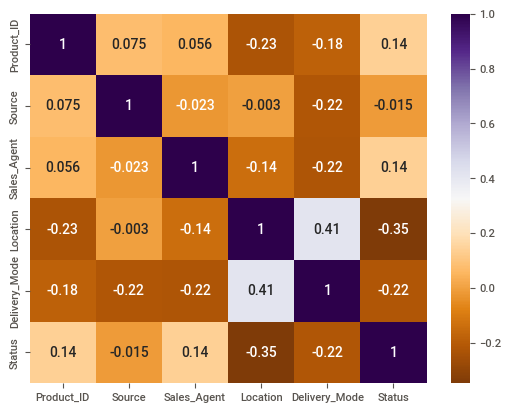

In [26]:
sns.heatmap(data.corr(),annot=True,cmap='PuOr')
plt.show()

In [27]:
y = data.Status
X = data.iloc[:,[0,1,2,3,4]]

In [29]:
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [30]:
# Splitting into training and testing data for accuracy
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [31]:
X_train.shape

(5129, 5)

In [32]:
X_test.shape

(2199, 5)

In [34]:
# SMOTE for sampling technique
smote = SMOTE()
X_train, y_train = smote.fit_resample(X_train, y_train)

In [35]:
X_train.shape

(6294, 5)

In [36]:
X_test.shape

(2199, 5)

# Model Training

# 1. Logistic Regression

In [37]:
# Training the model
from sklearn.linear_model import LogisticRegression
model_logr = LogisticRegression()
model_logr.fit(X_train,y_train)

LogisticRegression()

In [38]:
# Predicting the model
y_predict_log = model_logr.predict(X_test)

In [39]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_log))
print(classification_report(y_test,y_predict_log))

0.6571168713051387
              precision    recall  f1-score   support

           0       0.74      0.66      0.70      1319
           1       0.56      0.65      0.60       880

    accuracy                           0.66      2199
   macro avg       0.65      0.66      0.65      2199
weighted avg       0.67      0.66      0.66      2199



In [40]:
print(confusion_matrix(y_test,y_predict_log))

[[872 447]
 [307 573]]


# 2. Support Vector Machine

In [41]:
# Training the model
from sklearn.svm import SVC
parameters = {'kernel': ['rbf'], 'gamma': [0.1,1,5], 'C': [0.1,1,10,100]}
rbf_svc = RandomizedSearchCV(SVC(),parameters).fit(X_train,y_train)

In [42]:
rbf_svc.best_params_

{'kernel': 'rbf', 'gamma': 1, 'C': 1}

In [43]:
# Predicting the model
y_predict_svm = rbf_svc.predict(X_test)

In [44]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_svm))
print(classification_report(y_test,y_predict_svm))

0.6762164620281946
              precision    recall  f1-score   support

           0       0.74      0.71      0.72      1319
           1       0.59      0.63      0.61       880

    accuracy                           0.68      2199
   macro avg       0.67      0.67      0.67      2199
weighted avg       0.68      0.68      0.68      2199



In [45]:
print(confusion_matrix(y_test,y_predict_svm))

[[932 387]
 [325 555]]


# 3. Decision Tree with GridSearchCV

In [46]:
# Training the model
from sklearn.tree import DecisionTreeClassifier

classifier_dtg=DecisionTreeClassifier(random_state=42,splitter='best')
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini']},{'min_samples_split':[2,3,4,5],'criterion':['entropy']}]

model_griddtree=GridSearchCV(estimator=classifier_dtg, param_grid=parameters, scoring='accuracy',cv=10)
model_griddtree.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=42),
             param_grid=[{'criterion': ['gini'],
                          'min_samples_split': [2, 3, 4, 5]},
                         {'criterion': ['entropy'],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [47]:
model_griddtree.best_params_

{'criterion': 'entropy', 'min_samples_split': 2}

In [48]:
# Predicting the model
y_predict_dtree = model_griddtree.predict(X_test)

In [49]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_dtree))
print(classification_report(y_test,y_predict_dtree))

0.671668940427467
              precision    recall  f1-score   support

           0       0.73      0.72      0.72      1319
           1       0.59      0.60      0.59       880

    accuracy                           0.67      2199
   macro avg       0.66      0.66      0.66      2199
weighted avg       0.67      0.67      0.67      2199



In [50]:
print(confusion_matrix(y_test,y_predict_dtree))

[[949 370]
 [352 528]]


# 4. Random Forest with GridSearchCV 

In [51]:
# Training the model
from sklearn.ensemble import RandomForestClassifier

classifier_rfg=RandomForestClassifier(random_state=33,n_estimators=23)
parameters=[{'min_samples_split':[2,3,4,5],'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]}]

model_gridrf=GridSearchCV(estimator=classifier_rfg, param_grid=parameters, scoring='accuracy',cv=10)
model_gridrf.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=RandomForestClassifier(n_estimators=23, random_state=33),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'min_samples_leaf': [1, 2, 3],
                          'min_samples_split': [2, 3, 4, 5]}],
             scoring='accuracy')

In [52]:
model_gridrf.best_params_

{'criterion': 'gini', 'min_samples_leaf': 1, 'min_samples_split': 5}

In [53]:
# Predicting the model
y_predict_rf = model_gridrf.predict(X_test)

In [54]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_rf))
print(classification_report(y_test,y_predict_rf))

0.6884947703501592
              precision    recall  f1-score   support

           0       0.75      0.71      0.73      1319
           1       0.60      0.65      0.63       880

    accuracy                           0.69      2199
   macro avg       0.68      0.68      0.68      2199
weighted avg       0.69      0.69      0.69      2199



In [55]:
print(confusion_matrix(y_test,y_predict_rf))

[[939 380]
 [305 575]]


# 5. K-Nearest Neighbors

In [56]:
# Training the model
from sklearn.neighbors import KNeighborsClassifier
model_knn = KNeighborsClassifier(n_neighbors=6,metric='euclidean') # Maximum accuracy for n=10
model_knn.fit(X_train,y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=6)

In [57]:
# Predicting the model
y_predict_knn = model_knn.predict(X_test)

In [58]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_knn))
print(classification_report(y_test,y_predict_knn))

0.671668940427467
              precision    recall  f1-score   support

           0       0.70      0.79      0.74      1319
           1       0.61      0.49      0.55       880

    accuracy                           0.67      2199
   macro avg       0.66      0.64      0.64      2199
weighted avg       0.66      0.67      0.66      2199



In [59]:
print(confusion_matrix(y_test,y_predict_knn))

[[1042  277]
 [ 445  435]]


# 6. XGBoost Classifier

In [60]:
# Training the model
from xgboost import XGBClassifier
model_xgb = XGBClassifier(n_estimators=450,max_depth=17,gamma=5,learning_rate=0.01,random_state=10)
model_xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=17, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=450, n_jobs=None,
              num_parallel_tree=None, random_state=10, ...)

In [61]:
# Predicting the model
y_predict_xgb = model_xgb.predict(X_test.values)

In [62]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_xgb))
print(classification_report(y_test,y_predict_xgb))

0.6871305138699408
              precision    recall  f1-score   support

           0       0.77      0.68      0.72      1319
           1       0.59      0.70      0.64       880

    accuracy                           0.69      2199
   macro avg       0.68      0.69      0.68      2199
weighted avg       0.70      0.69      0.69      2199



In [63]:
print(confusion_matrix(y_test,y_predict_xgb))

[[896 423]
 [265 615]]


# 7. Artificial Neural Network

In [64]:
# Training the model
from sklearn.neural_network import MLPClassifier
model_mlp = MLPClassifier(hidden_layer_sizes=(100,100,100),batch_size=10,learning_rate_init=0.01,max_iter=2000,random_state=10)
model_mlp.fit(X_train,y_train)

MLPClassifier(batch_size=10, hidden_layer_sizes=(100, 100, 100),
              learning_rate_init=0.01, max_iter=2000, random_state=10)

In [65]:
# Predicting the model
y_predict_mlp = model_mlp.predict(X_test)

In [66]:
# Finding accuracy, precision, recall and confusion matrix
print(accuracy_score(y_test,y_predict_mlp))
print(classification_report(y_test,y_predict_mlp))

0.671668940427467
              precision    recall  f1-score   support

           0       0.75      0.68      0.71      1319
           1       0.58      0.66      0.62       880

    accuracy                           0.67      2199
   macro avg       0.66      0.67      0.66      2199
weighted avg       0.68      0.67      0.67      2199



In [68]:
print(confusion_matrix(y_test,y_predict_mlp))

[[898 421]
 [301 579]]
